In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch
from sklearn.metrics import silhouette_score

In [2]:
df= pd.read_csv('zoo.csv')

In [3]:
df.head()

,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


In [4]:
df.shape

(101, 18)

In [5]:
features= df.drop(['animal_name','class_type'],axis=1)

In [6]:
features


,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize
0,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1
1,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1
2,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0
3,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1
4,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1
97,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0
98,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1
99,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0


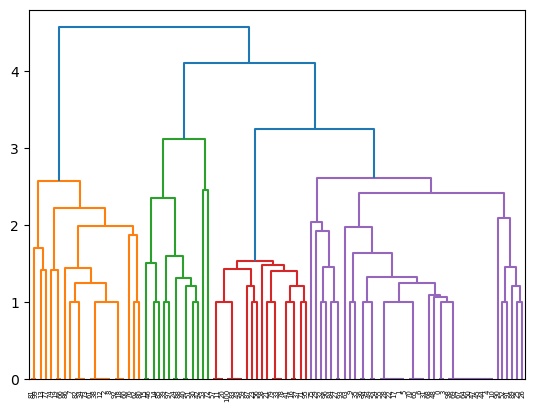

In [37]:
dendrogram= sch.dendrogram(sch.linkage(features, method='average'))

In [38]:
agg= AgglomerativeClustering(n_clusters=5,linkage='average')

In [39]:
cluster= agg.fit(features)

In [40]:
cluster.labels_

array([0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 3, 1, 1, 4, 4, 3, 0, 1, 1, 3, 3,
       0, 3, 4, 0, 0, 0, 0, 0, 4, 0, 0, 3, 1, 0, 0, 3, 1, 4, 4, 3, 4, 3,
       0, 0, 4, 0, 0, 0, 0, 4, 0, 2, 0, 0, 3, 3, 3, 3, 1, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 3, 2, 1, 1, 0, 1, 1, 3, 3, 1, 1, 1, 3, 0, 4, 1, 3,
       4, 0, 0, 0, 1, 0, 0, 3, 0, 4, 0, 1, 3], dtype=int64)

In [41]:
np.unique(cluster.labels_)

array([0, 1, 2, 3, 4], dtype=int64)

In [42]:
silhouette_score(features,cluster.labels_)

0.4456085727099543

## DBSCAN

In [44]:
df1= pd.read_csv('DB_dataset.csv')

In [45]:
df1

,Weight,Height
0,67.062924,176.086355
1,68.804094,178.388668
2,60.930863,170.284496
3,59.733843,168.691992
4,65.431230,173.763679
...,...,...
495,59.976983,169.679741
496,66.423814,174.625574
497,53.604698,161.919208
498,50.433644,160.794875


In [47]:
from sklearn.preprocessing import StandardScaler
std_scale= StandardScaler()

In [50]:
df1_new= pd.DataFrame(std_scale.fit_transform(df1),columns=df1.columns)

In [51]:
df1_new

,Weight,Height
0,1.115742,1.368788
1,1.451113,1.848408
2,-0.065368,0.160139
3,-0.295929,-0.171612
4,0.801458,0.884926
...,...,...
495,-0.249097,0.034156
496,0.992642,1.064476
497,-1.476478,-1.582524
498,-2.087262,-1.816746


In [53]:
from sklearn.cluster import DBSCAN

In [52]:
min_node=range(1,12)
eps= [0.1,0.2,0.3,0.4,0.5,0.6]

In [56]:
output=[]
for mn in min_node:
    for ep in eps:
        labels=DBSCAN(eps=ep,min_samples=mn).fit(df1_new).labels_
        score= silhouette_score(df1_new,labels)
        output.append([ep,mn,score])

In [59]:
len(output)

66

In [60]:
a= pd.DataFrame(output)

In [62]:
a.iloc[:,2].max()


0.6811897093459002

In [63]:
a[a[2]==0.6811897093459002]

,0,1,2
31,0.2,6,0.68119
37,0.2,7,0.68119
43,0.2,8,0.68119


In [72]:
labels=DBSCAN(eps=0.2,min_samples=7).fit(df1_new).labels_

In [73]:
labels

array([ 0,  0,  1,  1,  0,  1,  1,  1,  1,  2,  1,  0,  1,  2,  1,  1,  0,
        1,  2,  1,  1,  0,  1,  2,  1,  2,  0,  1,  2,  1,  1,  1,  0,  1,
        1, -1,  2,  1,  2,  0,  2,  1,  1,  0,  1,  0,  1,  1,  0,  0,  2,
        2,  1,  1,  1,  1,  1,  2,  2,  0,  0,  2,  0,  0,  0,  1,  1,  0,
        1,  1,  2,  1,  2,  0,  2,  0,  1,  1,  1,  1,  2,  1,  2,  1,  1,
        1,  2,  2,  0,  2,  2,  2,  0,  2,  1,  1,  0,  0,  0,  1,  2,  2,
        0,  2,  1,  1,  1,  0,  1,  2,  2,  1,  2,  2,  0,  2,  0,  1,  1,
        0,  1,  2,  0,  0,  2,  0,  0,  0,  0,  2,  1,  2,  1,  2,  2,  2,
        1,  0,  1,  1,  0,  0,  0,  0,  1,  2,  1,  1,  1,  2,  2,  0,  1,
        1,  1,  1,  1,  0,  1,  1,  0,  1,  0,  0,  1,  1, -1,  1,  2,  1,
        0,  2,  0,  1,  1,  2,  1,  2,  2,  2,  0,  0,  0,  1,  1,  2,  1,
        0,  1,  2,  0,  1,  2,  1,  1,  2,  1,  1,  1,  2,  2,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  0,  0,  0,  1,  0,  1,  2,  2,  2,  1,
        0,  1,  2,  1,  0

In [74]:
import seaborn as sns

<Axes: xlabel='Weight', ylabel='Height'>

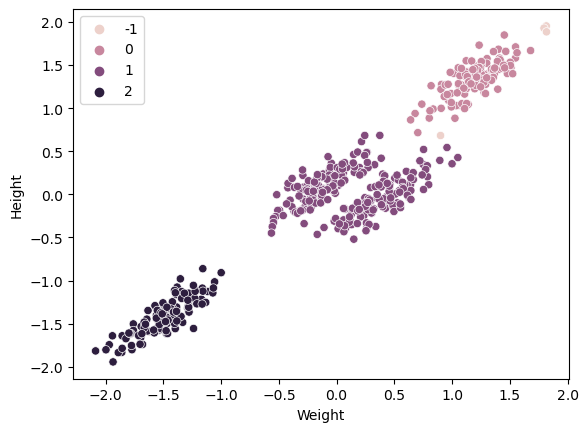

In [75]:
sns.scatterplot(data=df1_new,x='Weight',y='Height',hue=labels)